In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Data sets\Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
df.rename(columns={'Unnamed: 0': 'Sr. no.','Years Exp' : 'Years_Exp'}, inplace=True)
df.head()

,Sr. no.,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
df.isnull().sum()

Sr. no.            0
YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.shape

(30, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr. no.          30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [11]:
df.dtypes

Sr. no.              int64
YearsExperience    float64
Salary             float64
dtype: object

In [12]:
df.describe()

,Sr. no.,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [41]:
df.rename(columns={'YearsExperience':'Years_Exp'}, inplace=True)


<Axes: xlabel='Years_Exp', ylabel='Salary'>

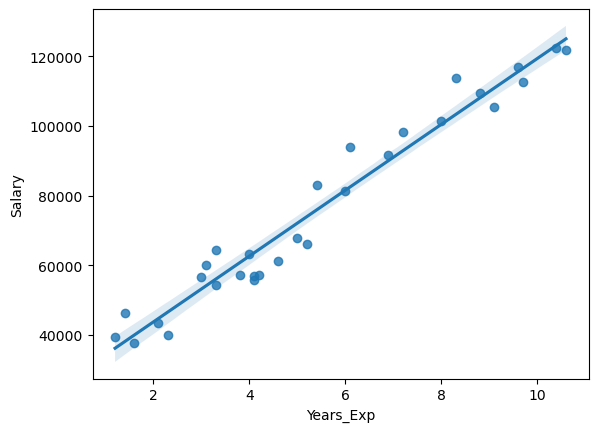

In [42]:
sns.regplot(x=df.Years_Exp,y=df.Salary)


In [46]:
df.corr()

,Years_Exp,Salary
Years_Exp,1.000000,0.978242
Salary,0.978242,1.000000


In [44]:
df ['Salary'].skew()

0.35411967922959153

In [45]:
df ['Years_Exp'].skew()

0.37956024064804234

<Axes: >

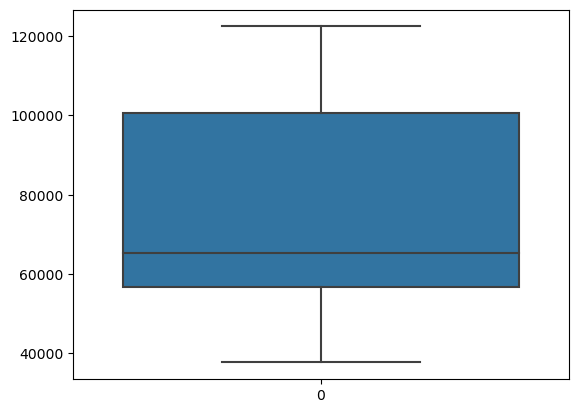

In [23]:
sns.boxplot(df['Salary'])

<Axes: >

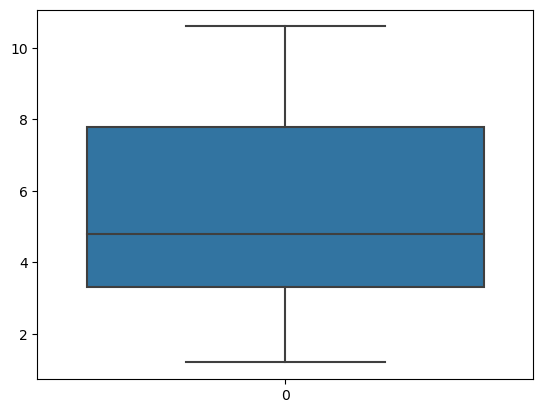

In [24]:
sns.boxplot(df['Years_Exp'])

In [25]:
x= df['Years_Exp']

x.head()

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: Years_Exp, dtype: float64

In [26]:
y= df['Salary']
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

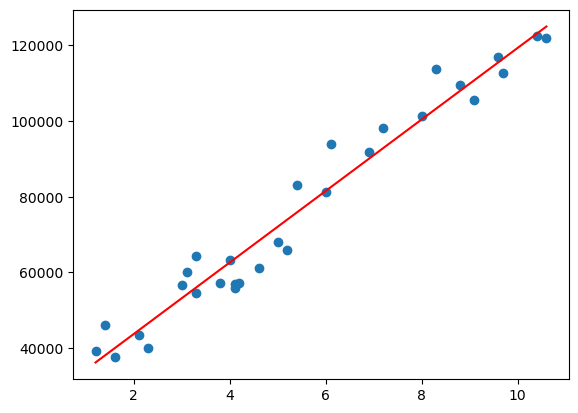

In [36]:
import numpy as np
plt.scatter(x,y)
m,b= np.polyfit(x,y,1)
plt.plot(x,m*x+b,'r')


In [48]:
from sklearn.model_selection import train_test_split
x = x.to_numpy().reshape(-1, 1)

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size= 0.7, random_state= 12)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21, 1), (21,), (9, 1), (9,))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr= LinearRegression()
lr

LinearRegression()

In [49]:
lr.fit(x_train,y_train)
x = x.reshape(-1,1)


In [50]:
print(lr.intercept_)

25832.661412829177


In [51]:
print(lr.coef_)

[9228.5908025]


In [52]:
y_pred= lr.predict(x_test)
y_pred

array([ 56287.01106107,  99661.38783282,  81204.20622782,  68284.17910432,
        38752.68853633,  92278.51519082,  47058.42025858,  71975.61542532,
       102429.96507357])

In [103]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(y_test,y_pred)
r2_sc= r2_score(y_test,y_pred)
r2_sc

0.9369810046174128

In [104]:
mse

38474768.53456032

In [107]:
from math import sqrt
sr_mse= sqrt(mse)
print('Mean Squarred Error:', mse)
print('Square Root Mean Squared Error:',sr_mse)
print('R Square:', r2_sc)

Mean Squarred Error: 38474768.53456032
Square Root Mean Squared Error: 6202.803280337071
R Square: 0.9369810046174128


In [109]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
7,54446.0,56287.011061
22,101303.0,99661.387833
18,81364.0,81204.206228
14,61112.0,68284.179104
1,46206.0,38752.688536
21,98274.0,92278.515191
4,39892.0,47058.420259
15,67939.0,71975.615425
23,113813.0,102429.965074
